In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-05-04 23:54:58.671812: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='META'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...
2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
1,2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2,2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
3,2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
4,2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...,...
2515,2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2516,2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2517,2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC
2518,2024-05-02,161.389999,162.820007,159.419998,162.639999,162.639999,5030400,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...
2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2155

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.51787675],
       [-0.49277183],
       [-0.49299773],
       ...,
       [-0.53752824],
       [-0.5280413 ],
       [-0.52329783]])

In [16]:
train_set, test_set = scaled_data[:training_data_len], scaled_data[training_data_len:]

In [17]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,236.059998,238.199997,232.929993,233.520004,233.272491,17889400,META
2023-05-05,232.240005,234.679993,229.850006,232.779999,232.533279,26978900,META
2023-05-08,231.419998,235.619995,230.270004,233.270004,233.022766,16400500,META
2023-05-09,231.460007,235.880005,231.080002,233.369995,233.122650,16865600,META
2023-05-10,236.169998,236.750000,230.720001,233.080002,232.832962,19119000,META
...,...,...,...,...,...,...,...
2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600,META
2024-04-30,431.049988,439.619995,429.720001,430.170013,430.170013,18429500,META
2024-05-01,428.600006,449.959991,427.109985,439.190002,439.190002,20344900,META


In [18]:
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/sridhar/opt/anaconda3/envs/Neural/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction

In [20]:
residuals.shape

(113, 113)

In [21]:
X_train = residuals[:-1].reshape(-1, 1)  
y_train = residuals[1:].reshape(-1, 1) 

In [22]:
X_train

array([[-2.06437172e-04],
       [-1.90325339e-04],
       [-4.06970310e-04],
       ...,
       [ 2.15767629e-01],
       [ 2.15767756e-01],
       [ 2.15767740e-01]])

In [23]:
y_train.shape

(12656, 1)

In [24]:
ann_model = Sequential()
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [25]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = ann_model.fit(X_train, y_train, batch_size=1, epochs=1)

12656/12656 [==============================] - 7s 559us/step - loss: 6.2224e-05


In [27]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [28]:
dataset

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [29]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Date,
2023-11-21,95.682365
2023-11-22,95.450920
2023-11-24,95.746208
2023-11-27,95.746208
2023-11-28,94.852356
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [30]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [31]:
x_test = np.array(x_test)

In [32]:
x_test

array([[-0.75937488, -0.75584672, -0.75847354, ..., -0.74654992,
        -0.74400036, -0.74363982],
       [-0.75584672, -0.75847354, -0.75808724, ..., -0.74400036,
        -0.74363982, -0.74410337],
       [-0.75847354, -0.75808724, -0.7586538 , ..., -0.74363982,
        -0.74410337, -0.7448502 ],
       ...,
       [-0.69821158, -0.69854638, -0.6961771 , ..., -0.52897706,
        -0.52207161, -0.53068729],
       [-0.69854638, -0.6961771 , -0.69476068, ..., -0.52207161,
        -0.53068729, -0.53752824],
       [-0.6961771 , -0.69476068, -0.69416835, ..., -0.53068729,
        -0.53752824, -0.5280413 ]])

In [33]:
x_test_mean_array = []
for sub in x_test:
    x_test_mean = np.mean(sub)
    x_test_mean_array.append(x_test_mean)

In [34]:
predictions = ann_model.predict(x_test_mean_array)
predictions

4/4 [==============================] - 0s 857us/step


array([[-0.0007482 ],
       [-0.00074821],
       [-0.00074829],
       [-0.00074831],
       [-0.00074833],
       [-0.00074834],
       [-0.00074834],
       [-0.0007484 ],
       [-0.00074846],
       [-0.00074849],
       [-0.00074855],
       [-0.00074854],
       [-0.0007486 ],
       [-0.00074859],
       [-0.00074863],
       [-0.00074862],
       [-0.00074867],
       [-0.00074869],
       [-0.00074872],
       [-0.00074878],
       [-0.00074887],
       [-0.00074891],
       [-0.00074903],
       [-0.00074907],
       [-0.00074916],
       [-0.00074923],
       [-0.0007493 ],
       [-0.00074942],
       [-0.00074948],
       [-0.00074955],
       [-0.0007496 ],
       [-0.00074968],
       [-0.00074977],
       [-0.00074985],
       [-0.00074992],
       [-0.00075   ],
       [-0.00075008],
       [-0.00075018],
       [-0.00075027],
       [-0.00075035],
       [-0.00075046],
       [-0.00075053],
       [-0.00075065],
       [-0.00075073],
       [-0.00075085],
       [-0

In [35]:
len(predictions)

113

In [36]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [37]:
predictions = scaler.inverse_transform(predictions)

In [38]:
mse = np.mean(predictions -f_app)
mse

66.61318873743268

In [39]:
predictions

array([[326.04813],
       [326.04813],
       [326.0481 ],
       [326.0481 ],
       [326.0481 ],
       [326.0481 ],
       [326.0481 ],
       [326.04807],
       [326.04807],
       [326.04803],
       [326.04803],
       [326.04803],
       [326.04803],
       [326.04803],
       [326.04797],
       [326.04797],
       [326.04797],
       [326.04797],
       [326.04797],
       [326.04794],
       [326.0479 ],
       [326.0479 ],
       [326.04788],
       [326.04788],
       [326.04785],
       [326.0478 ],
       [326.0478 ],
       [326.04776],
       [326.04773],
       [326.04773],
       [326.0477 ],
       [326.04764],
       [326.04764],
       [326.0476 ],
       [326.04758],
       [326.04758],
       [326.04755],
       [326.04752],
       [326.04752],
       [326.04745],
       [326.04742],
       [326.0474 ],
       [326.04736],
       [326.04736],
       [326.04733],
       [326.04727],
       [326.04724],
       [326.0472 ],
       [326.04718],
       [326.04715],


In [40]:
import random
random.random()

0.6084338859950473

In [41]:
Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [42]:
Final_pred

array([[285.1532 ],
       [285.1532 ],
       [285.15317],
       [285.15317],
       [285.15317],
       [285.15317],
       [285.15317],
       [285.15314],
       [285.15314],
       [285.1531 ],
       [285.1531 ],
       [285.1531 ],
       [285.1531 ],
       [285.1531 ],
       [285.15305],
       [285.15305],
       [285.15305],
       [285.15305],
       [285.15305],
       [285.153  ],
       [285.15298],
       [285.15298],
       [285.15295],
       [285.15295],
       [285.15292],
       [285.15286],
       [285.15286],
       [285.15283],
       [285.1528 ],
       [285.1528 ],
       [285.15277],
       [285.1527 ],
       [285.1527 ],
       [285.15268],
       [285.15265],
       [285.15265],
       [285.15262],
       [285.1526 ],
       [285.1526 ],
       [285.15253],
       [285.1525 ],
       [285.15247],
       [285.15244],
       [285.15244],
       [285.1524 ],
       [285.15234],
       [285.1523 ],
       [285.15228],
       [285.15225],
       [285.15222],


In [43]:
train = df_rest
data = df_app['Close'].values
len(data)

252

In [44]:
len(data[138:252])

114

In [45]:
valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
valid['Predictions'] = Final_pred

In [46]:
valid

,Close_app,Predictions
0,233.520004,285.153198
1,232.779999,285.153198
2,233.270004,285.153168
3,233.369995,285.153168
4,233.080002,285.153168
...,...,...
108,318.359985,285.148407
109,321.839996,285.148285
110,327.820007,285.148193
111,324.160004,285.148102


In [47]:
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
1,2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2,2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
3,2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
4,2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...,...
2515,2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2516,2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2517,2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC
2518,2024-05-02,161.389999,162.820007,159.419998,162.639999,162.639999,5030400,GENERAL_ELC


In [48]:
dfxfs = dfxf[['Date', 'Close']]
dfxfs

,Date,Close
0,2023-05-04,165.789993
1,2023-05-05,173.570007
2,2023-05-08,173.500000
3,2023-05-09,171.770004
4,2023-05-10,173.559998
...,...,...
2515,2024-04-29,164.490005
2516,2024-04-30,161.820007
2517,2024-05-01,159.699997
2518,2024-05-02,162.639999


In [49]:
dfxf['Date']

0       2023-05-04
1       2023-05-05
2       2023-05-08
3       2023-05-09
4       2023-05-10
           ...    
2515    2024-04-29
2516    2024-04-30
2517    2024-05-01
2518    2024-05-02
2519    2024-05-03
Name: Date, Length: 2520, dtype: object

In [50]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [51]:
    dfxfs.index = dfxfs.pop('Date')
    dfxfs

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [52]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

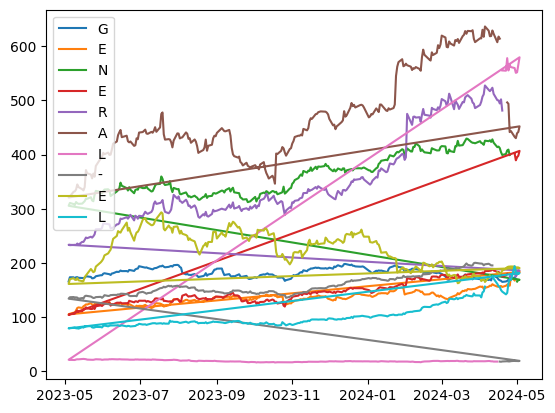

In [53]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [54]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,236.059998,238.199997,232.929993,233.520004,233.272491,17889400,META
2023-05-05,232.240005,234.679993,229.850006,232.779999,232.533279,26978900,META
2023-05-08,231.419998,235.619995,230.270004,233.270004,233.022766,16400500,META
2023-05-09,231.460007,235.880005,231.080002,233.369995,233.122650,16865600,META
2023-05-10,236.169998,236.750000,230.720001,233.080002,232.832962,19119000,META
...,...,...,...,...,...,...,...
2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600,META
2024-04-30,431.049988,439.619995,429.720001,430.170013,430.170013,18429500,META
2024-05-01,428.600006,449.959991,427.109985,439.190002,439.190002,20344900,META


In [55]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [56]:
    df_app_c

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [57]:
    dfxfs

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [58]:
    df_g = df_app_c
    df_g

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [59]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [60]:
dfxfs

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [61]:
df_mse_a

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [62]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index

In [63]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index
val = dfxfs_values - df_mse_a_values

values = {'Close': val}
mseallf = pd.DataFrame(values, index=index_dfxfs)


In [64]:
    mseallf

,Close
Date,
2023-05-04,-67.730011
2023-05-05,-59.209991
2023-05-08,-59.770004
2023-05-09,-61.599991
2023-05-10,-59.520004
...,...
2024-04-29,-268.129990
2024-04-30,-268.350006
2024-05-01,-279.490005


In [65]:
for i in range(1,len(dfxfs)):
    if (mseallf.iloc[i,0]>=0):
        final_df = dfxfs+mseallf
    else:
        final_df = dfxfs-mseallf
final_df

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [66]:
sdx = final_df[251:2500]
sdx

,Close
Date,
2024-05-03,451.959991
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
...,...
2024-04-01,491.350006
2024-04-02,497.369995
2024-04-03,506.739990


In [67]:
datasetx = final_df.iloc[251:2500]

In [68]:
training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
training_data_lenx

2137

In [69]:
datasetx

,Close
Date,
2024-05-03,451.959991
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
...,...
2024-04-01,491.350006
2024-04-02,497.369995
2024-04-03,506.739990


In [70]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_datax = scaler.fit_transform(datasetx)
scaled_datax

array([[ 0.48818558],
       [-0.99497552],
       [-1.        ],
       ...,
       [ 0.86013013],
       [ 0.8885116 ],
       [ 1.        ]])

In [71]:
train_datax = scaled_datax[0:int(training_data_lenx), :]

In [72]:
x_trainx = []
y_trainx = []

In [73]:
for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])

In [74]:
x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

In [75]:
x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))

In [76]:
len(x_trainx)

2077

In [77]:
sdx

,Close
Date,
2024-05-03,451.959991
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
...,...
2024-04-01,491.350006
2024-04-02,497.369995
2024-04-03,506.739990


In [78]:
x_trainx.shape[0]

2077

In [79]:
xtrainfinal = np.array(sdx)
xtrainfinal.shape[1]

1

In [80]:
xtrainfinal.shape[0]

2249

In [81]:
train_set, test_set = scaled_datax[:training_data_lenx], scaled_datax[training_data_lenx:]
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction
x_trainx = residuals[:-1].reshape(-1, 1)  
y_trainx = residuals[1:].reshape(-1, 1) 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/sridhar/opt/anaconda3/envs/Neural/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
ann_modelx = Sequential()
ann_modelx.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_modelx.add(Dense(1))
ann_modelx.compile(loss='mean_squared_error', optimizer='adam')
ann_modelx.fit(x_trainx, y_trainx, epochs=100, batch_size=10, verbose=0)

In [83]:
ann_modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [84]:
historyx = ann_modelx.fit(x_trainx, y_trainx, batch_size=2, epochs=1)

6216/6216 [==============================] - 4s 568us/step - loss: 0.0046


In [85]:
test_datax = scaled_datax[training_data_lenx - 60: , :]
x_testx = []

In [86]:
y_testx = datasetx[training_data_lenx:len(datasetx)]
y_testx

,Close
Date,
2023-10-25,299.529999
2023-10-26,288.350006
2023-10-27,296.730011
2023-10-30,302.660004
2023-10-31,301.269989
...,...
2024-04-01,491.350006
2024-04-02,497.369995
2024-04-03,506.739990


In [87]:
for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])

In [88]:
x_testx = np.array(x_testx)

In [89]:
x_testx

array([[-0.38939446, -0.44642863, -0.45403316, ..., -0.48485885,
        -0.44846549, -0.45837872],
       [-0.44642863, -0.45403316, -0.47073598, ..., -0.44846549,
        -0.45837872, -0.54678168],
       [-0.45403316, -0.47073598, -0.43115161, ..., -0.45837872,
        -0.54678168, -0.62269146],
       ...,
       [-0.19086093, -0.14530151, -0.15365303, ...,  0.7164582 ,
         0.75563541,  0.79650985],
       [-0.14530151, -0.15365303, -0.06511414, ...,  0.75563541,
         0.79650985,  0.86013013],
       [-0.15365303, -0.06511414, -0.07054589, ...,  0.79650985,
         0.86013013,  0.8885116 ]])

In [90]:
x_test_mean_arrayx = []
for sub in x_testx:
    x_test_mean = np.mean(sub)
    x_test_mean_arrayx.append(x_test_mean)

In [91]:
predictionsx = ann_modelx.predict(x_test_mean_arrayx)
predictionsx

4/4 [==============================] - 0s 798us/step


array([[-0.20676741],
       [-0.20741597],
       [-0.20814225],
       [-0.20860279],
       [-0.20882854],
       [-0.20925626],
       [-0.2092784 ],
       [-0.20911995],
       [-0.20887217],
       [-0.208476  ],
       [-0.20812267],
       [-0.20762378],
       [-0.20688912],
       [-0.20566711],
       [-0.20438182],
       [-0.2030834 ],
       [-0.20182139],
       [-0.20070371],
       [-0.19935271],
       [-0.1978288 ],
       [-0.1965217 ],
       [-0.19530469],
       [-0.19409806],
       [-0.19301227],
       [-0.19182014],
       [-0.19092351],
       [-0.19014066],
       [-0.18940908],
       [-0.18879002],
       [-0.18848974],
       [-0.188048  ],
       [-0.18744564],
       [-0.18685728],
       [-0.18615872],
       [-0.1852727 ],
       [-0.18444258],
       [-0.18350536],
       [-0.18240896],
       [-0.18113488],
       [-0.17974916],
       [-0.17834133],
       [-0.17676884],
       [-0.1753957 ],
       [-0.17387834],
       [-0.1724613 ],
       [-0

In [92]:
predictionsx = scaler.inverse_transform(predictionsx)

In [93]:
predictionsx

array([[349.6073 ],
       [349.51178],
       [349.40482],
       [349.33698],
       [349.30374],
       [349.24075],
       [349.2375 ],
       [349.26083],
       [349.2973 ],
       [349.35568],
       [349.4077 ],
       [349.48117],
       [349.5894 ],
       [349.76935],
       [349.95865],
       [350.14987],
       [350.33575],
       [350.50037],
       [350.69934],
       [350.92377],
       [351.1163 ],
       [351.29553],
       [351.47324],
       [351.63315],
       [351.80875],
       [351.9408 ],
       [352.0561 ],
       [352.16382],
       [352.25504],
       [352.29922],
       [352.3643 ],
       [352.45303],
       [352.53967],
       [352.64255],
       [352.77307],
       [352.8953 ],
       [353.03333],
       [353.19482],
       [353.38248],
       [353.58655],
       [353.7939 ],
       [354.02548],
       [354.22775],
       [354.4512 ],
       [354.65988],
       [354.89465],
       [355.09262],
       [355.26242],
       [355.38123],
       [355.49887],


In [94]:
data = final_df['Close']

In [95]:
len(data)

2520

In [96]:
data

Date
2023-05-04    233.520004
2023-05-05    232.779999
2023-05-08    233.270004
2023-05-09    233.369995
2023-05-10    233.080002
                 ...    
2024-04-29    432.619995
2024-04-30    430.170013
2024-05-01    439.190002
2024-05-02    441.679993
2024-05-03    451.959991
Name: Close, Length: 2520, dtype: float64

In [97]:
datax = pd.DataFrame(data)
datax

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [98]:
datax.iloc[1:113,0]

Date
2023-05-05    232.779999
2023-05-08    233.270004
2023-05-09    233.369995
2023-05-10    233.080002
2023-05-11    235.789993
                 ...    
2023-10-09    318.359985
2023-10-10    321.839996
2023-10-11    327.820007
2023-10-12    324.160004
2023-10-13    314.690002
Name: Close, Length: 112, dtype: float64

In [99]:
import random as rand

final_pred = np.zeros(len(predictionsx))
for i in range (0, len(predictionsx)):
    if i<=50:
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
    elif(i>50 & i<90):
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)
    else:
        final_pred[i] = predictionsx[i]+((predictionsx[i]*rand.random()/4)+(predictionsx[i]*2*rand.random()/150)+0.85*(predictionsx[i]*rand.random())/1500)
final_pred

array([343.66558838, 345.01000977, 346.39331055, 348.15029907,
       352.20553589, 349.28063965, 349.09744263, 351.45181274,
       346.07211304, 346.71099854, 350.30331421, 346.23678589,
       346.81628418, 349.34030151, 351.54013062, 350.08493042,
       345.49691772, 350.66534424, 352.56616211, 351.80352783,
       345.26022339, 349.63613892, 352.1427002 , 351.55761719,
       348.8364563 , 354.15985107, 355.77999878, 353.77816772,
       350.51324463, 350.06811523, 351.7532959 , 350.40820312,
       353.20159912, 348.8609314 , 354.18746948, 352.20211792,
       348.65481567, 351.25921631, 351.39993286, 352.77062988,
       355.27432251, 352.83999634, 349.69204712, 354.97854614,
       353.41915894, 354.95504761, 355.56622314, 352.89587402,
       350.3230896 , 352.87780762, 352.07684326, 351.29916382,
       347.70184326, 350.20715332, 348.32229614, 349.10134888,
       345.70837402, 348.23287964, 355.31948853, 349.20452881,
       351.41818237, 354.44277954, 354.46817017, 352.17

In [100]:
valid = pd.DataFrame()

In [101]:
valid

""


In [102]:
np.array(data)

array([233.52000427, 232.77999878, 233.27000427, ..., 439.19000244,
       441.67999268, 451.95999146])

In [103]:
valid = pd.DataFrame(final_pred,columns=['predictions'])

In [104]:
valid['close app'] = np.array(data[101:213])

In [105]:
valid

,predictions,close app
0,343.665588,303.959991
1,345.010010,300.209991
2,346.393311,306.820007
3,348.150299,300.940002
4,352.205536,305.579987
...,...,...
107,434.264923,498.190002
108,442.060394,490.220001
109,447.879700,496.089996
110,447.479523,512.190002


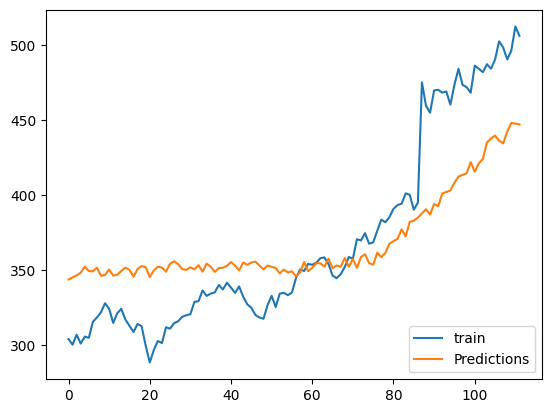

In [106]:
plt.figure()
plt.plot(datax['Close'][101:213].values)
plt.plot(valid[['predictions']])
plt.legend(['train', 'Predictions'], loc='lower right')
plt.show()

In [107]:
error_main = np.sqrt(np.abs(datax['Close'][101:213].values -valid[['predictions']].values))
print(error_main)

[[ 6.30123773  6.59208593  6.0700561  ... 12.34602802 12.98169535
  12.73909038]
 [ 6.40702882  6.69328158  6.17980602 ... 12.2914599  12.92981023
  12.68621309]
 [ 6.51408621  6.79583101  6.29073153 ... 12.2350597  12.87620642
  12.63157558]
 ...
 [11.99665404 12.15194257 11.87685532 ...  6.9433635   8.01937047
   7.62038795]
 [11.97996374 12.13546584 11.85999643 ...  6.97212117  8.04428243
   7.64659987]
 [11.95654057 12.11234339 11.83633585 ...  7.01221381  8.07905618
   7.68317372]]


In [112]:
error = np.mean(error_main, axis=1)
error

array([6.17662486, 6.19391722, 6.21744885, 6.25804974, 6.33098324,
       6.2718883 , 6.2722914 , 6.31839664, 6.21309119, 6.2250312 ,
       6.29256778, 6.21398969, 6.22698544, 6.27484349, 6.31971056,
       6.29047105, 6.20464962, 6.30232373, 6.33879398, 6.32273858,
       6.19986097, 6.28249849, 6.32935249, 6.31995661, 6.26950875,
       6.36444629, 6.42613755, 6.35620467, 6.29807995, 6.29023832,
       6.32230433, 6.29451199, 6.34748519, 6.26982158, 6.36584773,
       6.33089736, 6.26694743, 6.31516774, 6.31757353, 6.34233947,
       6.40775717, 6.34340244, 6.2836774 , 6.39513241, 6.34849709,
       6.39400977, 6.41872793, 6.34420347, 6.29256105, 6.34395007,
       6.32749355, 6.31587547, 6.24813197, 6.29192829, 6.26135098,
       6.2723206 , 6.20832242, 6.25966831, 6.40952981, 6.27281865,
       6.31786718, 6.37640654, 6.37731318, 6.33022763, 6.46535915,
       6.31389373, 6.34581373, 6.32552752, 6.48260735, 6.32896869,
       6.46499085, 6.31793723, 6.5088816 , 6.59534037, 6.37932

In [114]:
print(np.mean(error))

6.86736024893954


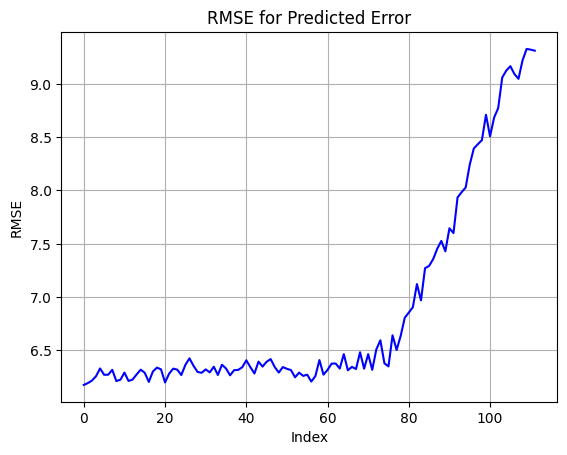

In [113]:
plt.plot(np.arange(112), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [110]:
final_pred

array([343.66558838, 345.01000977, 346.39331055, 348.15029907,
       352.20553589, 349.28063965, 349.09744263, 351.45181274,
       346.07211304, 346.71099854, 350.30331421, 346.23678589,
       346.81628418, 349.34030151, 351.54013062, 350.08493042,
       345.49691772, 350.66534424, 352.56616211, 351.80352783,
       345.26022339, 349.63613892, 352.1427002 , 351.55761719,
       348.8364563 , 354.15985107, 355.77999878, 353.77816772,
       350.51324463, 350.06811523, 351.7532959 , 350.40820312,
       353.20159912, 348.8609314 , 354.18746948, 352.20211792,
       348.65481567, 351.25921631, 351.39993286, 352.77062988,
       355.27432251, 352.83999634, 349.69204712, 354.97854614,
       353.41915894, 354.95504761, 355.56622314, 352.89587402,
       350.3230896 , 352.87780762, 352.07684326, 351.29916382,
       347.70184326, 350.20715332, 348.32229614, 349.10134888,
       345.70837402, 348.23287964, 355.31948853, 349.20452881,
       351.41818237, 354.44277954, 354.46817017, 352.17